In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Reading texts

In this notebook we will read a single text file, and experiment with tokenization, normalization, and filtering.

In [2]:
import nltk
import matplotlib.pyplot as plt

## Read a file from disk

In [3]:
# Try changing this path to point to a different text file.
raw_text = nltk.load('../data/lorem.txt')    

In [4]:
raw_text

u'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Pellentesque non lacinia velit, quis scelerisque orci. Fusce ac nisi sit amet justo porta aliquam. Fusce ac arcu ut diam imperdiet hendrerit. Integer vitae finibus lacus. Mauris pellentesque, ipsum eget scelerisque molestie, diam est molestie arcu, a blandit nulla eros ut dui. Pellentesque odio massa, rutrum nec magna ac, viverra pulvinar magna. Duis ultricies, ligula id vulputate eleifend, metus leo semper ante, sed suscipit lacus odio non justo.\n\nInterdum et malesuada fames ac ante ipsum primis in faucibus. Donec a libero et nisl tincidunt dignissim in et arcu. Nam eleifend mi ut sodales suscipit. Aenean sit amet nunc tincidunt, facilisis purus et, porta dui. Maecenas id tortor fusce malesuada sem accumsan feugiat. Pellentesque molestie velit nec arcu consectetur, sed tempor tellus varius. In hac habitasse platea dictumst. Aliquam erat volutpat. Sed placerat varius purus eget semper.\n\nFusce quis risus eu purus faucibus di

## Tokenization

Tokenization is the process of splitting up a text into "tokens". For our purposes, the tokens that we are interested in are usually words.

The simplest approach might be to split the text wherever we find a space. This can work just fine, but there are several undesirable artefacts; newlines and punctuation are kept.

In [5]:
raw_text.split(' ')

[u'Lorem',
 u'ipsum',
 u'dolor',
 u'sit',
 u'amet,',
 u'consectetur',
 u'adipiscing',
 u'elit.',
 u'Pellentesque',
 u'non',
 u'lacinia',
 u'velit,',
 u'quis',
 u'scelerisque',
 u'orci.',
 u'Fusce',
 u'ac',
 u'nisi',
 u'sit',
 u'amet',
 u'justo',
 u'porta',
 u'aliquam.',
 u'Fusce',
 u'ac',
 u'arcu',
 u'ut',
 u'diam',
 u'imperdiet',
 u'hendrerit.',
 u'Integer',
 u'vitae',
 u'finibus',
 u'lacus.',
 u'Mauris',
 u'pellentesque,',
 u'ipsum',
 u'eget',
 u'scelerisque',
 u'molestie,',
 u'diam',
 u'est',
 u'molestie',
 u'arcu,',
 u'a',
 u'blandit',
 u'nulla',
 u'eros',
 u'ut',
 u'dui.',
 u'Pellentesque',
 u'odio',
 u'massa,',
 u'rutrum',
 u'nec',
 u'magna',
 u'ac,',
 u'viverra',
 u'pulvinar',
 u'magna.',
 u'Duis',
 u'ultricies,',
 u'ligula',
 u'id',
 u'vulputate',
 u'eleifend,',
 u'metus',
 u'leo',
 u'semper',
 u'ante,',
 u'sed',
 u'suscipit',
 u'lacus',
 u'odio',
 u'non',
 u'justo.\n\nInterdum',
 u'et',
 u'malesuada',
 u'fames',
 u'ac',
 u'ante',
 u'ipsum',
 u'primis',
 u'in',
 u'faucibus.',
 

A better way is to split on any whitespace, and to separate punctuation from adjacent tokens. The nltk package has a tokenizer called the [Penn Treebank Tokenizer](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.treebank) that does the job.

In [6]:
# Shortcut for Penn Treebank Tokenizer.
from nltk import word_tokenize    

In [7]:
tokens = word_tokenize(raw_text)

In [8]:
tokens

[u'Lorem',
 u'ipsum',
 u'dolor',
 u'sit',
 u'amet',
 u',',
 u'consectetur',
 u'adipiscing',
 u'elit',
 u'.',
 u'Pellentesque',
 u'non',
 u'lacinia',
 u'velit',
 u',',
 u'quis',
 u'scelerisque',
 u'orci',
 u'.',
 u'Fusce',
 u'ac',
 u'nisi',
 u'sit',
 u'amet',
 u'justo',
 u'porta',
 u'aliquam',
 u'.',
 u'Fusce',
 u'ac',
 u'arcu',
 u'ut',
 u'diam',
 u'imperdiet',
 u'hendrerit',
 u'.',
 u'Integer',
 u'vitae',
 u'finibus',
 u'lacus',
 u'.',
 u'Mauris',
 u'pellentesque',
 u',',
 u'ipsum',
 u'eget',
 u'scelerisque',
 u'molestie',
 u',',
 u'diam',
 u'est',
 u'molestie',
 u'arcu',
 u',',
 u'a',
 u'blandit',
 u'nulla',
 u'eros',
 u'ut',
 u'dui',
 u'.',
 u'Pellentesque',
 u'odio',
 u'massa',
 u',',
 u'rutrum',
 u'nec',
 u'magna',
 u'ac',
 u',',
 u'viverra',
 u'pulvinar',
 u'magna',
 u'.',
 u'Duis',
 u'ultricies',
 u',',
 u'ligula',
 u'id',
 u'vulputate',
 u'eleifend',
 u',',
 u'metus',
 u'leo',
 u'semper',
 u'ante',
 u',',
 u'sed',
 u'suscipit',
 u'lacus',
 u'odio',
 u'non',
 u'justo',
 u'.',
 u'

In most of the workflows that we will use in this course, it is typical to represent a **document** as a list of tokens like the one above.

NTLK provides a representation called [``Text``](http://www.nltk.org/api/nltk.html#nltk.text.Text) that provides some helpful tools for exploring your document. It is basically just a wrapper around the tokens.

In [9]:
text = nltk.Text(tokens)

We can find all of the occurrences of a token in the document using the [``concordance()``](http://www.nltk.org/api/nltk.html#nltk.text.Text.concordance) method.

In [10]:
text.concordance('velit')

Displaying 3 of 3 matches:
                                     velit , quis scelerisque orci . Fusce ac n
msan feugiat . Pellentesque molestie velit nec arcu consectetur , sed tempor te
entum tristique , orci dui ultricies velit , at pretium nibh justo a sem . In f


Similarly, the [``dispersion_plot()``](http://www.nltk.org/api/nltk.html#nltk.text.Text.dispersion_plot) shows the relative position in which specific tokens occur.

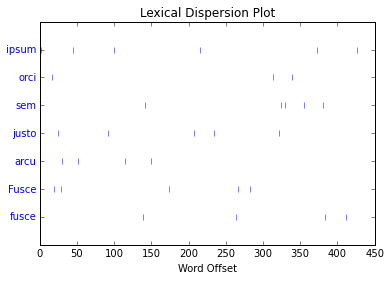

In [11]:
text.dispersion_plot(['ipsum', 'orci', 'sem', 'justo', 'arcu', 'Fusce', 'fusce'])

We can plot the frequency of the top 20 most common tokens in the text using the [``plot()``](http://www.nltk.org/api/nltk.html#nltk.text.Text.plot) method.

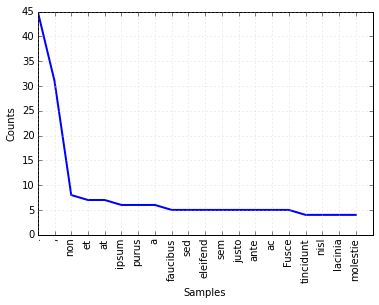

In [12]:
text.plot(20)

## Normalization

Notice in the dispersion plot example, above, that ``Fusce`` and ``fusce`` are treated as distinct tokens. The computer does not know that ``Fusce`` and ``fusce`` are the same -- one starts with an ``F``, and the other starts with an ``f``, which are two entirely different characters.

**Normalization** is the process of transforming tokens into a standardized representation. The simplest form of normalization is to convert all tokens to lower case, which we can do prior to tokenization using the [``lower()``](https://docs.python.org/2/library/stdtypes.html#str.lower) method.

In [13]:
print raw_text.lower()[:500]    # Only show the first 500 characters (0 - 499) of the string.

lorem ipsum dolor sit amet, consectetur adipiscing elit. pellentesque non lacinia velit, quis scelerisque orci. fusce ac nisi sit amet justo porta aliquam. fusce ac arcu ut diam imperdiet hendrerit. integer vitae finibus lacus. mauris pellentesque, ipsum eget scelerisque molestie, diam est molestie arcu, a blandit nulla eros ut dui. pellentesque odio massa, rutrum nec magna ac, viverra pulvinar magna. duis ultricies, ligula id vulputate eleifend, metus leo semper ante, sed suscipit lacus odio no


In [14]:
tokens = word_tokenize(raw_text.lower())
text = nltk.Text(tokens)

In [15]:
print text[:10]    # Only show the first 10 tokens (0-9) in the document.

[u'lorem', u'ipsum', u'dolor', u'sit', u'amet', u',', u'consectetur', u'adipiscing', u'elit', u'.']


Now notice that the token ``Fusce`` (with the upper-case ``F``) does not appear in the document; all occurrences of ``Fusce`` have bee **normalized** to ``fusce`` (with a lowercase ``f``).

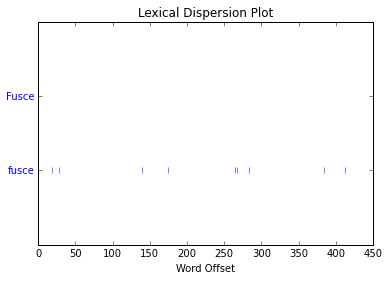

In [16]:
text.dispersion_plot(['Fusce', 'fusce'])

### Stemming

Stemming is another useful normalization procedure. Sometimes (depending on our research question), distinguishing word forms like "evolutionary" and "evolution" is not desirable. Stemming basically involves chopping off affixes so that only the "root" or "stem" of the word remains.

The NLTK package provides several different stemmers. 

In [18]:
raw_text = nltk.load('../data/abstract.txt')
tokens = word_tokenize(raw_text.lower())
print tokens[:50]    # Only the first 50 tokens.

[u'this', u'paper', u'describes', u'the', u'preliminary', u'results', u'of', u'three', u'experiments', u'in', u'subjective', u'probability', u'forecasting', u'which', u'were', u'recently', u'conducted', u'in', u'four', u'weather', u'service', u'forecast', u'offices', u'(', u'wsfos', u')', u'of', u'the', u'national', u'weather', u'service', u'.', u'the', u'first', u'experiment', u',', u'which', u'was', u'conducted', u'at', u'the', u'st.', u'louis', u'wsfo', u',', u'was', u'designed', u'to', u'investigate', u'both']


Here's an example of normalization with the [Porter stemmer](http://tartarus.org/martin/PorterStemmer/), which has been around since the late 1970s:

In [19]:
porter = nltk.PorterStemmer()
print [porter.stem(token) for token in tokens][:50]

[u'thi', u'paper', u'describ', u'the', u'preliminari', u'result', u'of', u'three', u'experi', u'in', u'subject', u'probabl', u'forecast', u'which', u'were', u'recent', u'conduct', u'in', u'four', u'weather', u'servic', u'forecast', u'offic', u'(', u'wsfo', u')', u'of', u'the', u'nation', u'weather', u'servic', u'.', u'the', u'first', u'experi', u',', u'which', u'wa', u'conduct', u'at', u'the', u'st.', u'loui', u'wsfo', u',', u'wa', u'design', u'to', u'investig', u'both']


...and the [Lancaster stemmer](http://www.scientificpsychic.com/paice/paice.html):

In [20]:
lancaster = nltk.LancasterStemmer()
print [lancaster.stem(token) for token in tokens][:50]

[u'thi', u'pap', u'describ', u'the', u'prelimin', u'result', u'of', u'three', u'expery', u'in', u'subject', u'prob', u'forecast', u'which', u'wer', u'rec', u'conduc', u'in', u'four', u'weath', u'serv', u'forecast', u'off', u'(', u'wsfos', u')', u'of', u'the', u'nat', u'weath', u'serv', u'.', u'the', u'first', u'expery', u',', u'which', u'was', u'conduc', u'at', u'the', u'st.', u'lou', u'wsfo', u',', u'was', u'design', u'to', u'investig', u'both']


...and the [Snowball stemmer](http://snowball.tartarus.org/) (which is actually a collection of stemmers for a whole bunch of different languages):

In [21]:
snowball = nltk.SnowballStemmer("english")
print [snowball.stem(token) for token in tokens][:50]

[u'this', u'paper', u'describ', u'the', u'preliminari', u'result', u'of', u'three', u'experi', u'in', u'subject', u'probabl', u'forecast', u'which', u'were', u'recent', u'conduct', u'in', u'four', u'weather', u'servic', u'forecast', u'offic', u'(', u'wsfos', u')', u'of', u'the', u'nation', u'weather', u'servic', u'.', u'the', u'first', u'experi', u',', u'which', u'was', u'conduct', u'at', u'the', u'st.', u'loui', u'wsfo', u',', u'was', u'design', u'to', u'investig', u'both']


### Lemmatization

An alternate approach to stemming is to **lemmatize** tokens. Instead of chopping up any old word that it encounters, the [WordNet](https://wordnet.princeton.edu/) lemmatizer tries to match tokens with known words in the WordNet lexical database, and then convert them to a known "lemma" ("lexicon headword"). If the lemmatizer encounters a token that it does not recognize, it will just leave the token as-is.

In [22]:
wordnet = nltk.WordNetLemmatizer()
print [wordnet.lemmatize(token) for token in tokens][:50]

[u'this', u'paper', u'describes', u'the', u'preliminary', u'result', u'of', u'three', u'experiment', u'in', u'subjective', u'probability', u'forecasting', u'which', u'were', u'recently', u'conducted', u'in', u'four', u'weather', u'service', u'forecast', u'office', u'(', u'wsfos', u')', u'of', u'the', u'national', u'weather', u'service', u'.', u'the', u'first', u'experiment', u',', u'which', u'wa', u'conducted', u'at', u'the', u'st.', u'louis', u'wsfo', u',', u'wa', u'designed', u'to', u'investigate', u'both']


### Side-by-side comparisons

Here's a side-by-side comparison of the stemmers shown above.

In [23]:
stemmers = [porter.stem, lancaster.stem, snowball.stem, wordnet.lemmatize]
print '\t'.join([t.ljust(8) for t in ['original', 'porter', 'lancaster', 'snowball', 'wordnet']])
print '--'*40
for token in tokens[:30]:
    print token.ljust(8),
    for stemmer in stemmers:
        print '\t', stemmer(token).ljust(8),
    print

original	porter  	lancaster	snowball	wordnet 
--------------------------------------------------------------------------------
this     	thi      	thi      	this     	this    
paper    	paper    	pap      	paper    	paper   
describes 	describ  	describ  	describ  	describes
the      	the      	the      	the      	the     
preliminary 	preliminari 	prelimin 	preliminari 	preliminary
results  	result   	result   	result   	result  
of       	of       	of       	of       	of      
three    	three    	three    	three    	three   
experiments 	experi   	expery   	experi   	experiment
in       	in       	in       	in       	in      
subjective 	subject  	subject  	subject  	subjective
probability 	probabl  	prob     	probabl  	probability
forecasting 	forecast 	forecast 	forecast 	forecasting
which    	which    	which    	which    	which   
were     	were     	wer      	were     	were    
recently 	recent   	rec      	recent   	recently
conducted 	conduct  	conduc   	conduct  	conducted
in 

## Filtering

Finally, depending on our analysis, we may want to filter out various tokens. For example, we may wish to exclude common words like pronouns. The easiest way to remove these kinds of tokens is by using a **stoplist**. A stoplist is simply a list of undesirable words.

NLTK provides stoplist containing around 2,400 words from 11 different languages.

In [24]:
from nltk.corpus import stopwords

Here are the English stopwords:

In [25]:
stoplist = stopwords.words('english')
print stoplist

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

We can filter out tokens in the stoplist like so:

In [26]:
print [token for token in tokens if token not in stoplist][:20]

[u'paper', u'describes', u'preliminary', u'results', u'three', u'experiments', u'subjective', u'probability', u'forecasting', u'recently', u'conducted', u'four', u'weather', u'service', u'forecast', u'offices', u'(', u'wsfos', u')', u'national']


We may also want to remove any punctuation tokens (note the parentheses, above). We can do that using the [``isalpha()``](https://docs.python.org/2/library/stdtypes.html#str.isalpha) method.

In [27]:
print [token for token in tokens if token.isalpha()][:20]

[u'this', u'paper', u'describes', u'the', u'preliminary', u'results', u'of', u'three', u'experiments', u'in', u'subjective', u'probability', u'forecasting', u'which', u'were', u'recently', u'conducted', u'in', u'four', u'weather']


## Putting it all together

Once you have decided on a strategy for tokenizing, normalizing, and filtering your texts, it's a good idea to encapsulate that logic in functions that we can apply as needed.

In [28]:
def normalize_token(token):
    """
    Convert token to lowercase, and stem using the Porter algorithm.
    
    Parameters
    ----------
    token : str
    
    Returns
    -------
    token : str
    """
    return porter.stem(token.lower())

In [29]:
def filter_token(token):
    """
    Evaluate whether or not to retain ``token``.
    
    Parameters
    ----------
    token : str
    
    Returns
    -------
    keep : bool
    """
    token = token.lower()
    return token not in stoplist and token.isalpha() and len(token) > 3

Let's compare the effect on our token distributions. Here's the top 20 tokens when we tokenize only:

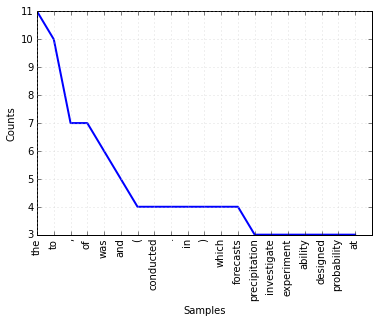

In [30]:
unprocessed_text = nltk.Text(word_tokenize(raw_text))
unprocessed_text.plot(20)

And here's the top 20 tokens when we apply our processing pipeline:

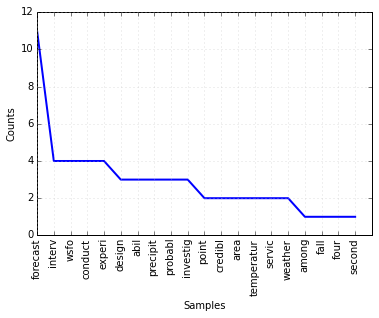

In [31]:
proccessed_text = nltk.Text([normalize_token(token) for token 
                             in word_tokenize(raw_text)
                             if filter_token(token)])
proccessed_text.plot(20)